# INFERENTIAL STATISTICS HANDSON

### A large retail chain (eg reliance, walmart ) operates 10000 stores and we want to know (consultants) what is the average daily sales per store

#### Approach : lets us taka a sample of stores n = 200 , avg of sample store is 120k/day  and sample std deviation sales is 15k/day

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## STEP 1 . Generate sample data (200 stores)
sales = np.random.normal(loc=120000,scale=15000,size=200) #loc: mean of the distribution , scale: std deviation , size : no of sample.
sales

array([132324.35828286, 135388.02167373, 131974.24083891, 134736.8793491 ,
       138386.08652607, 121728.88782647, 128325.52580012, 116607.0063944 ,
       116676.36994547, 108936.56338653, 112208.17132511, 126220.70086425,
       143597.70162969,  98873.22598229, 105045.9497722 , 131967.48676641,
       137420.7899154 , 125544.06705849, 122922.32293857, 118848.36433148,
       122038.14766671, 120647.05461705, 117787.2634939 , 129423.63671437,
       116058.91238348, 138925.60055475, 124991.42656544, 104382.72682291,
       122292.01266807, 106545.23984651, 116104.19229264, 123407.38427804,
        96263.9034801 , 119090.5759211 , 129206.44985892, 160104.77298389,
       136529.64626495, 109918.73041572, 143323.910817  ,  96726.76832594,
       118601.30009172, 137136.21012702, 111824.55654578, 107157.22608398,
       125857.83795393, 122697.79159637, 126667.42361407, 131809.67178393,
       129138.48740645, 123908.20002568, 142126.35509675,  98135.93199653,
       141353.35102317, 1

In [3]:
print('Shape of the array :', sales.shape)
print('Mean of the sales data :', np.mean(sales))
print('Std. deviation of the sales data :', np.std(sales))

Shape of the array : (200,)
Mean of the sales data : 120248.3853653283
Std. deviation of the sales data : 14637.493458569039


## let us plot the sales distribution

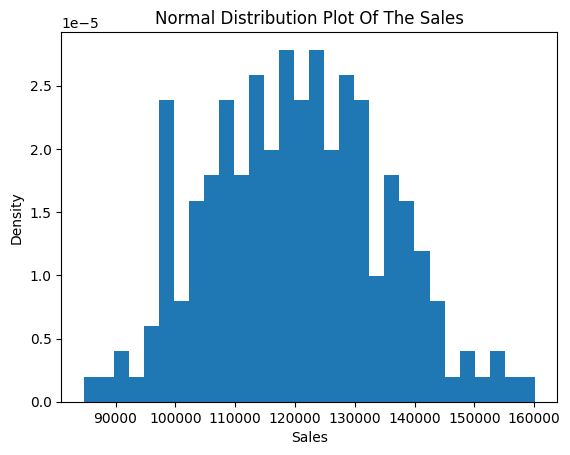

In [4]:
plt.figure()
plt.hist(sales,bins=30,density=True)
plt.title('Normal Distribution Plot Of The Sales')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()

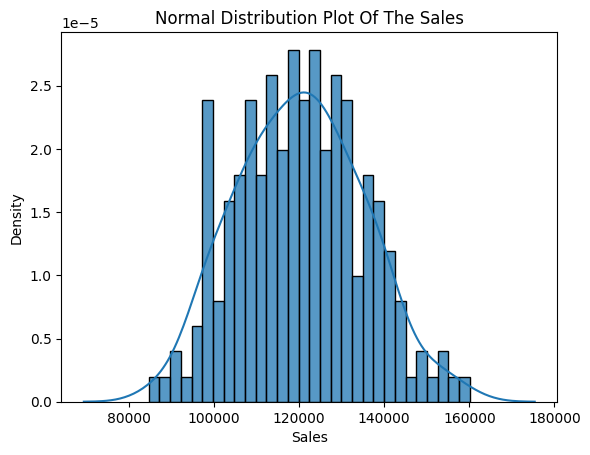

In [5]:
plt.figure()
sns.histplot(sales,bins=30,stat='density')
plt.title('Normal Distribution Plot Of The Sales')
sns.kdeplot(sales)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()

Now we take the normal distribution curve and transform it into the standard normal distribution one using z-score technique

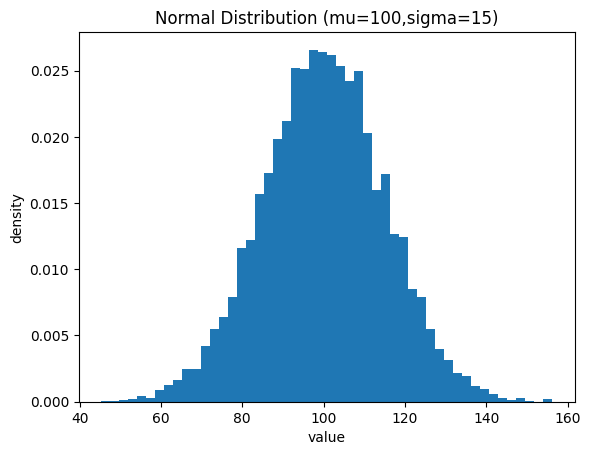

In [6]:
#generate data 
mu=100
sigma=15
data=np.random.normal(mu,sigma,10000)
# plot histogram
plt.hist(data,bins=50 , density=True)
plt.title('Normal Distribution (mu=100,sigma=15)')
plt.xlabel('value')
plt.ylabel('density')
plt.show()

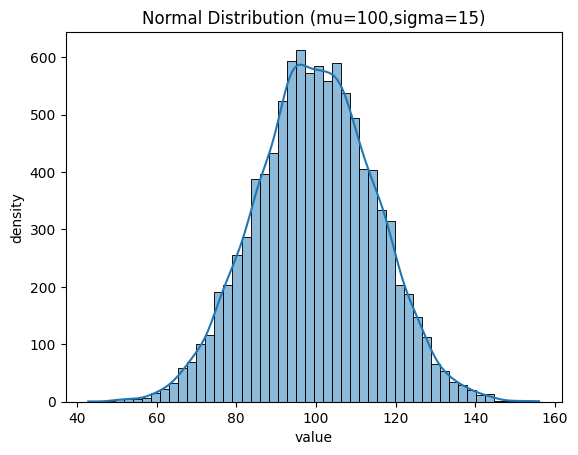

In [7]:
#generate data 
mu=100
sigma=15
data=np.random.normal(mu,sigma,10000)
# plot histogram
sns.histplot(data,bins=50 , kde=True)
plt.title('Normal Distribution (mu=100,sigma=15)')
plt.xlabel('value')
plt.ylabel('density')
plt.show()

In [8]:
mu_sigma_1=np.mean((data>=mu - sigma) & (data<=mu+sigma))
mu_sigma_2=np.mean((data>=mu - 2*sigma) & (data<=mu+2*sigma))
mu_sigma_3=np.mean((data>=mu - 3*sigma) & (data<=mu+3*sigma))
mu_sigma_1,mu_sigma_2,mu_sigma_3

(np.float64(0.6819), np.float64(0.9577), np.float64(0.9978))

# CONFIDENCE INTERVAL CALCULATION

In [9]:
sales

array([132324.35828286, 135388.02167373, 131974.24083891, 134736.8793491 ,
       138386.08652607, 121728.88782647, 128325.52580012, 116607.0063944 ,
       116676.36994547, 108936.56338653, 112208.17132511, 126220.70086425,
       143597.70162969,  98873.22598229, 105045.9497722 , 131967.48676641,
       137420.7899154 , 125544.06705849, 122922.32293857, 118848.36433148,
       122038.14766671, 120647.05461705, 117787.2634939 , 129423.63671437,
       116058.91238348, 138925.60055475, 124991.42656544, 104382.72682291,
       122292.01266807, 106545.23984651, 116104.19229264, 123407.38427804,
        96263.9034801 , 119090.5759211 , 129206.44985892, 160104.77298389,
       136529.64626495, 109918.73041572, 143323.910817  ,  96726.76832594,
       118601.30009172, 137136.21012702, 111824.55654578, 107157.22608398,
       125857.83795393, 122697.79159637, 126667.42361407, 131809.67178393,
       129138.48740645, 123908.20002568, 142126.35509675,  98135.93199653,
       141353.35102317, 1

In [10]:
sales.shape

(200,)

In [11]:
# compute sample statistics
sample_mean=np.mean(sales)
sample_std=np.std(sales,ddof=1) # degree of freedom
sample_size=len(sales)
sample_mean
sample_std
sample_size

200

In [12]:
## STEP-3. Choose the significance level (alpha)
alpha=0.05 #95% confidence level

In [13]:
z=stats.norm.ppf(1-alpha/2)
z

np.float64(1.959963984540054)

In [14]:
## Calculate margin of errors
margin_error= z * (sample_std/np.sqrt(sample_size))
margin_error

np.float64(2033.7064537175409)

In [15]:
## confidence level
lt=sample_mean - margin_error
ut=sample_mean + margin_error
print("confidence interval",lt,"-",ut)

confidence interval 118214.67891161075 - 122282.09181904585


## STATISTICAL TESTS

### Z-TEST

#### 1. ONE SAMPLE Z-TEST
PURPOSE :  To check the sample mean is significantly different from the population mean

##### A factory produces a ball of 5cm in diameter
##### but due to manufacturing condition every ball may not have exactly the same diameter , the std of the diameter is 0.4
##### now the quality officer would like to test whether the diameter is significantly different from 5 cm in  the sample of 50 balls randomly taken from manufacturing line.

In [16]:
pip install bioinfokit

  Using cached bioinfokit-2.1.4.tar.gz (88 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached matplotlib-venn-1.1.2.tar.gz (40 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached textwrap3-0.9.2-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached adjustText-1.3.0-py3-none-any.whl.metadata (3.1 kB)
Using cached adjustText-1.3.0-py3-none-any.whl (13 kB)
   ---------------------------------------- 0.0/9


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from bioinfokit.analys import get_data # get the data for learning statistical tests 

In [18]:
df=get_data('z_one_samp').data # 50 balls diameter from the bioinfokit library
df

,sizes
0,4.819289
1,3.569358
2,5.346402
3,5.950908
4,5.871183
5,5.590780
6,3.591993
7,5.137837
8,3.870271
9,4.624155


In [19]:
from bioinfokit.analys import stat # to run the statistical test

In [20]:
result=stat() # creating object for stats
result.ztest(df=df,x='sizes',mu=5,x_std=0.4,test_type=1) # since we are doing one sample z-test
print(result.summary)


One Sample Z-test 

------------------  ---------
Sample size         50
Mean                 5.01796
Z value              0.317465
p value (one-tail)   0.375446
p value (two-tail)   0.750891
Lower 95.0%          4.90709
Upper 95.0%          5.12883
------------------  ---------


### Interpretation 
P-value obtained from the one sample z-test is not significant(since p value is more than alpha) and therefore we conclude that sample mean of the diameter 50 balls is truly representing the population and hence this batch must be accepted 

#### Get the data for two sample z-test

In [21]:
df2=get_data('z_two_samp').data
df2

,fact_A,fact_B
0,4.977904,5.887947
1,5.166254,5.990616
2,4.991749,6.110116
3,4.901557,5.936784
4,4.713866,6.227506
5,4.934422,6.212974
6,5.073323,6.011131
7,5.307374,6.307755
8,4.952200,6.180797
9,5.258307,6.498658


In [22]:
res=stat()

In [23]:
df2.columns

Index(['fact_A', 'fact_B'], dtype='object')

In [28]:
res.ztest(df=df2 , x='fact_A', y='fact_B',x_std=0.01,y_std=0.01,test_type=2)
print(res.summary)


Two Sample Z-test 

------------------  -----------
Sample size for x     50
Sample size for y     50
Mean of x              5.01284
Mean of y              5.99015
Z value             -488.656
p value (one-tail)     0
p value (two-tail)     0
Lower 95.0%           -0.981232
Upper 95.0%           -0.973392
------------------  -----------


p value obtained from the two sample z-test is **highly significant**(p-value < alpha -- 0<0.5) ,
this indicate that there is a significant difference in the ball size produced in factory a and b .
    hence we can conlcude that there is an indeed a defect in the machine for a ball production in factory b.

## t-test

t-test is specifically designed for the sample size n<30

### one sample t-test

it is used for comparing the sample mean with the specific value(mean of the population)
in the t-test the population variance sigma ^2 is unknown an d it is estimated from the sample variance s^2

#### load the data for one sample t-test

In [29]:
df=get_data('t_one_samp').data
df

,size
0,5.739987
1,5.254042
2,5.152388
3,4.870819
4,3.536251
5,6.257171
6,5.673992
7,4.499758
8,4.326765
9,5.037926


In [30]:
df_t_test=df.sample(20)
df_t_test.shape

(20, 1)

In [34]:
res_t_test=stat()
res_t_test.ttest(df=df_t_test,test_type=1,res='size',mu=5)
print(res_t_test.summary)


One Sample t-test 

------------------  ---------
Sample size         20
Mean                 4.89573
t                   -0.411162
Df                  19
p value (one-tail)   0.342777
p value (two-tail)   0.685554
Lower 95.0%          4.36494
Upper 95.0%          5.42652
------------------  ---------


#### INTERPRETATION

p value =0.22 and alpha =0.5 since pvalue obtained from the one sample t-test is not significant (as alpha 0.22>0.05).
    and therefore we conclude that the average diameter of the balls in a random sample is almost equal to 5cm , basically accept the null hypothesis

## two sample ttest

it compares the means of the independent groups ,determining whether they are equal or significantly different 
in two sample ttest usually we compute the sample means from the two groups & derives the conclusion for the 
population's mean (unknown mean ) from which two groups are drawn

In [35]:
df2_ttest=df2.sample(20)
df2_ttest

,fact_A,fact_B
16,5.015273,5.819603
45,4.879662,5.904267
7,5.307374,6.307755
0,4.977904,5.887947
28,5.099190,5.921532
23,5.089679,5.838825
32,4.988156,6.159250
22,5.080771,5.329566
17,4.917085,5.876728
33,5.219697,5.778515


In [36]:
df2_ttest.shape


(20, 2)

### melting the data in pandas

In [ ]:
melted_df=pd.melt(df2_ttest , var_name='factory',value_name='value')